### Packages

In [9]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

### Loading The Dataset and Splitting The Data Into Train/Test Sets

In [22]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


You can display the images contained in the dataset. Images are 64x64 pixels in RGB format (3 channels).

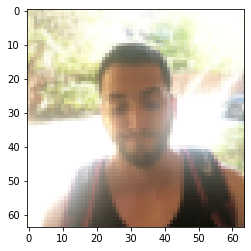

In [11]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

## A Sequential API

### Happy Model

In [12]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            tf.keras.Input(shape=(64 , 64 ,3)),
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tfl.ZeroPadding2D(padding=3), # As import tensorflow.keras.layers as tfl
            ## Conv2D with 32 7x7 filters and stride of 1
            tfl.Conv2D(filters=32,kernel_size=7,strides=1),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis=3, momentum=0.99, epsilon=0.001),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D with default parameters
            tfl.MaxPool2D(),
            ## Flatten layer
            tfl.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(1,activation='sigmoid')
        ])
    
    return model

In [13]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']


In [14]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [15]:
happy_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [16]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 11s 56ms/step - loss: 0.9715 - accuracy: 0.7367
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.1921 - accuracy: 0.9300
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.3006 - accuracy: 0.8950
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1663 - accuracy: 0.9433: 0s - loss: 0.2259 - accuracy: 
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0825 - accuracy: 0.9667
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0704 - accuracy: 0.9733
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0737 - accuracy: 0.9767 ETA: 0s - loss: 0.0598 - accuracy: 0.9861   - ETA: 0s - loss: 0.0550 - accuracy: 
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0827 - accuracy: 0.9733
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0672 - accuracy: 0.9733
Ep

In [17]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 15ms/step - loss: 0.2146 - accuracy: 0.9333


[0.21463808417320251, 0.9333333373069763]

## A Functional API

### Loading The SIGNS Dataset

In [18]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


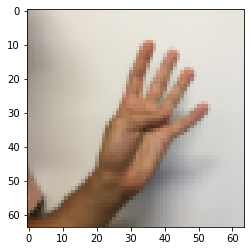

In [20]:
# Example of an image from the dataset
index = 5
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

Examine the shapes of the data.

In [26]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 6)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 6)


### Convolution Model

In [28]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tfl.Conv2D(filters= 8. , kernel_size=4 , padding='same',strides=1)(input_img)
    ## RELU
    A1 = tfl.ReLU()(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPool2D(pool_size=8, strides=8, padding='SAME')(A1)
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tfl.Conv2D(filters= 16. , kernel_size=2 , padding='same',strides=1)(P1)
    ## RELU
    A2 =  tfl.ReLU()(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tfl.MaxPool2D(pool_size=4, strides=4, padding='SAME')(A2)
    ## FLATTEN
    F = tfl.Flatten()(P2)
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    outputs = tfl.Dense(units= 6 , activation='softmax')(F)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [29]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_5 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 16)          0   

### Training The Model

In [30]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
10/10 [==============================] - 2s 40ms/step - loss: 1.6008 - accuracy: 0.1500 - val_loss: 1.3793 - val_accuracy: 0.5400
Epoch 2/100
10/10 [==============================] - 0s 15ms/step - loss: 1.2166 - accuracy: 0.4817 - val_loss: 0.9965 - val_accuracy: 0.4600
Epoch 3/100
10/10 [==============================] - 0s 15ms/step - loss: 0.8775 - accuracy: 0.4900 - val_loss: 0.7702 - val_accuracy: 0.4667
Epoch 4/100
10/10 [==============================] - 0s 15ms/step - loss: 0.7343 - accuracy: 0.5150 - val_loss: 0.6898 - val_accuracy: 0.5733
Epoch 5/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6980 - accuracy: 0.5100 - val_loss: 0.6839 - val_accuracy: 0.5933
Epoch 6/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6875 - accuracy: 0.5633 - val_loss: 0.6690 - val_accuracy: 0.6600
Epoch 7/100
10/10 [==============================] - 0s 16ms/step - loss: 0.6777 - accuracy: 0.5933 - val_loss: 0.6661 - val_accuracy: 0.6400
Epoch 

10/10 [==============================] - 0s 18ms/step - loss: 0.2460 - accuracy: 0.9217 - val_loss: 0.3488 - val_accuracy: 0.8800
Epoch 59/100
10/10 [==============================] - 0s 21ms/step - loss: 0.2415 - accuracy: 0.9233 - val_loss: 0.3455 - val_accuracy: 0.8867
Epoch 60/100
10/10 [==============================] - 0s 17ms/step - loss: 0.2370 - accuracy: 0.9283 - val_loss: 0.3429 - val_accuracy: 0.8867
Epoch 61/100
10/10 [==============================] - 0s 17ms/step - loss: 0.2324 - accuracy: 0.9300 - val_loss: 0.3397 - val_accuracy: 0.8867
Epoch 62/100
10/10 [==============================] - 0s 16ms/step - loss: 0.2274 - accuracy: 0.9300 - val_loss: 0.3363 - val_accuracy: 0.8867
Epoch 63/100
10/10 [==============================] - 0s 16ms/step - loss: 0.2227 - accuracy: 0.9333 - val_loss: 0.3313 - val_accuracy: 0.8867
Epoch 64/100
10/10 [==============================] - 0s 17ms/step - loss: 0.2178 - accuracy: 0.9317 - val_loss: 0.3250 - val_accuracy: 0.8933
Epoch 65/100

### History Object

The history object is an output of the .fit() operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that you can retrieve at history.history:

In [31]:
history.history

{'loss': [1.6007784605026245,
  1.2165532112121582,
  0.8775290846824646,
  0.7342517375946045,
  0.697983980178833,
  0.6874667406082153,
  0.6777241230010986,
  0.6698486804962158,
  0.6604722738265991,
  0.652273416519165,
  0.643261194229126,
  0.6338393688201904,
  0.6240355968475342,
  0.6118415594100952,
  0.6010233759880066,
  0.5889891386032104,
  0.5773900747299194,
  0.5654776096343994,
  0.5542179942131042,
  0.5427893996238708,
  0.5312861204147339,
  0.5193691253662109,
  0.5072238445281982,
  0.49493688344955444,
  0.48353058099746704,
  0.4725573658943176,
  0.46150949597358704,
  0.4509468972682953,
  0.44068360328674316,
  0.4308251440525055,
  0.42128849029541016,
  0.4123472273349762,
  0.4038394093513489,
  0.3955124616622925,
  0.3875492215156555,
  0.37996113300323486,
  0.3725704848766327,
  0.36524146795272827,
  0.3582335412502289,
  0.35136330127716064,
  0.344636470079422,
  0.337816059589386,
  0.3312531113624573,
  0.32480373978614807,
  0.3183982968330383

### Visualizing The Loss And Accuracy

C:\Users\Furkan Can\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

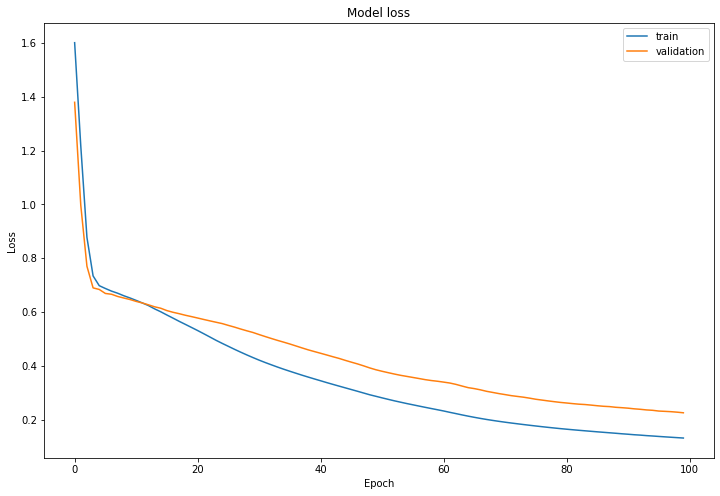

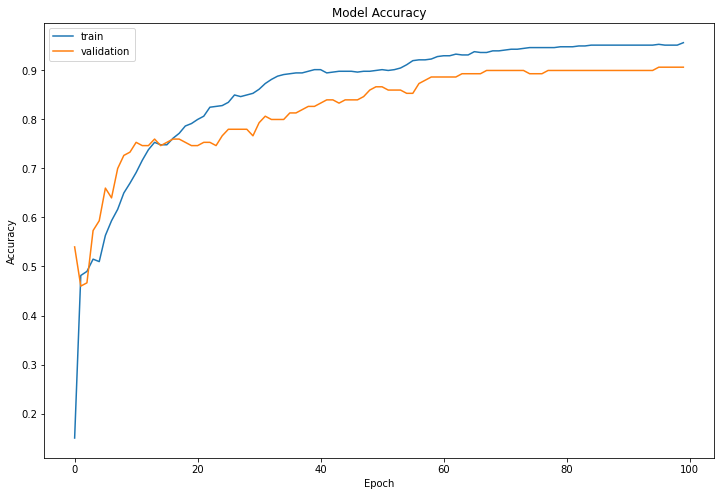

In [32]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')